# MINST DATASET TRAINED MODEL

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
t = transforms.ToTensor()

# Load datasets for training and testing.
mnist_training = datasets.MNIST(root='/tmp/mnist', train=True, download=True, transform=t)
mnist_val = datasets.MNIST(root='/tmp/mnist', train=False, download=True, transform=t)


Using downloaded and verified file: /tmp/mnist\MNIST\raw\train-images-idx3-ubyte.gz
Extracting /tmp/mnist\MNIST\raw\train-images-idx3-ubyte.gz to /tmp/mnist\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /tmp/mnist\MNIST\raw\train-labels-idx1-ubyte.gz to /tmp/mnist\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /tmp/mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to /tmp/mnist\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /tmp/mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to /tmp/mnist\MNIST\raw



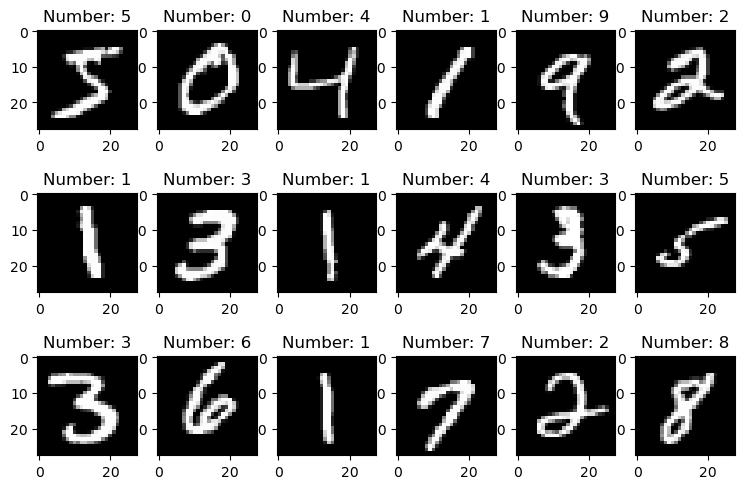

In [11]:
cols = 6
rows = 3

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(1.5*cols, 2*rows))
for i, ax in enumerate(axes.flatten()):
    image, Number = mnist_training[i]          # returns PIL image with its labels
    ax.set_title(f"Number: {Number}")
    ax.imshow(image.squeeze(0), cmap='gray') 
plt.show()

In [12]:
# Create a simple neural network .
model = torch.nn.Sequential(
    torch.nn.Linear(28*28, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

opt = torch.optim.Adam(params=model.parameters(), lr=0.01)

loss_fn = torch.nn.CrossEntropyLoss()

batch_size = 500
train_loader = torch.utils.data.DataLoader(mnist_training, batch_size=batch_size, shuffle=True)


In [9]:
# Training of the model. 
losses = []

for epoch in range(10):
    for imgs, labels in train_loader:
        n = len(imgs)
        predictions = model(imgs.view(n, -1))  
        loss = loss_fn(predictions, labels) 
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(float(loss))
    print(f"Epoch: {epoch}, Loss: {float(loss)}")

Epoch: 0, Loss: 0.1673741638660431
Epoch: 1, Loss: 0.06519932299852371
Epoch: 2, Loss: 0.0810537040233612
Epoch: 3, Loss: 0.0324232392013073
Epoch: 4, Loss: 0.04387753829360008
Epoch: 5, Loss: 0.01607453264296055
Epoch: 6, Loss: 0.013886270113289356
Epoch: 7, Loss: 0.013097637332975864
Epoch: 8, Loss: 0.016406062990427017
Epoch: 9, Loss: 0.011430666781961918


In [13]:
# Determine the accuracy .
n = 10000
loader = torch.utils.data.DataLoader(mnist_val, batch_size=n)
images, labels = iter(loader).next()

data = images.view(n, -1)

predictions = model(data)

predicted_classes = torch.argmax(predictions, dim=1)

sum(predicted_classes.numpy() == labels.numpy()) / n

0.0793